Based on the paper by Laure Buhry, Automated Parameter Estimation of the Hodgkin-Huxley Model Using the Differential Evolution Algorithm, we want to investigate the steady state curve and time constant curve. Hopefully it can give us some insights on the cretirias for $\frac{dm_{\infty}}{dt}(V_{2m})$ and $\tau_m$

In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
params_m = {}
params_m['V_offset'] = -33.8
params_m['V_slope'] = 8.14

In [70]:
def m_inf(V, params_m): 
    return 1 / (1 + np.exp((params_m['V_offset']-V) / params_m['V_slope']))

In [71]:
# get steady state curve/activation curve
def draw_m_inf_curve(params_m):
    m_infty_curve = m_inf(np.arange(-100, 100), params_m)

    plt.plot(range(-100, 100), m_infty_curve)

    plt.xlabel('Membrane Voltage (mV)')
    plt.ylabel('$m_\infty$')
    plt.title('Activation Steady State Curve')
    plt.show()

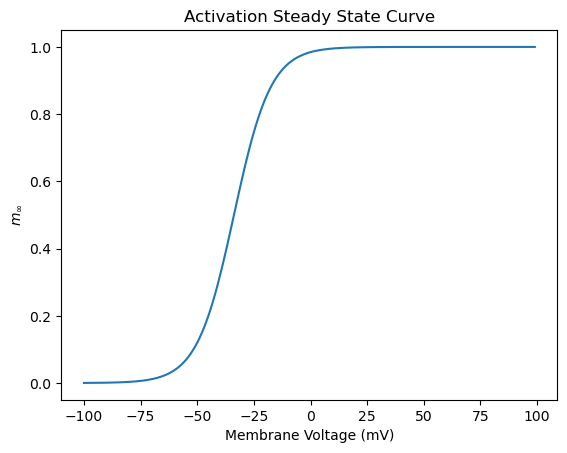

In [72]:
draw_m_inf_curve(params_m)

Finding derivative of $m_{\infty}$, and calculate $\frac{dm_{\infty}}{dt} (V_{2m})$

In this formulation, we dont need to find $V_{2m}$, it is the same as $V_{offset}$

In [73]:
def m_inf_der(V, params_m):
    return np.exp((-V+params_m['V_offset']) / params_m['V_slope']) / (params_m['V_slope'] * (np.exp((-V+params_m['V_offset']) / params_m['V_slope'])) ** 2)

In [94]:
import numpy as np

def generate_random_params(params_bounds):
    random_params = {}
    for param, bounds in params_bounds.items():
        random_params[param] = np.random.uniform(bounds[0], bounds[1])
    return random_params

# Example usage with your provided bounds
params_bounds = {'V_offset': (-500.0, -33.8), 'V_slope': (1.00, 8.14)}

random_params = generate_random_params(params_bounds)
print(random_params)


{'V_offset': -292.70590155937725, 'V_slope': 7.070762628311546}


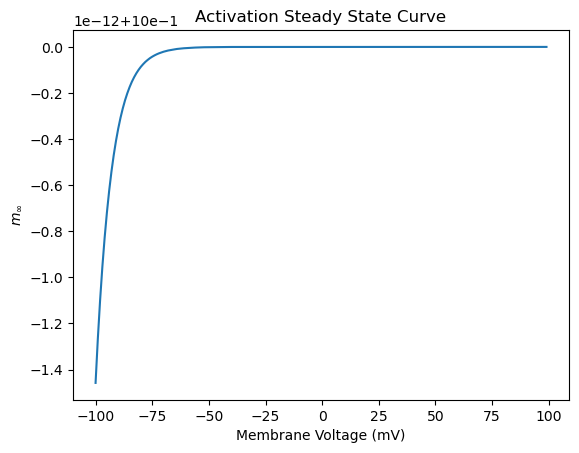

In [95]:
draw_m_inf_curve(random_params)